(image-filtering:convolution)=
# 卷积
当我们对图像应用所谓的_线性_滤波器时，我们将每个新像素计算为其邻居的加权和。这个过程被称为[_卷积_](https://en.wikipedia.org/wiki/Convolution)，定义权重的矩阵被称为_卷积核_。在显微镜领域，我们经常谈论显微镜的点扩散函数（PSF）。从技术上讲，这个PSF描述了图像在我们保存到磁盘之前如何被显微镜卷积。

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imread
from pyclesperanto_prototype import imshow
from skimage import filters
from skimage.morphology import ball
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

cle.select_device('RTX')

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

为了演示卷积的原理，我们首先定义一个相当简单的示例图像。

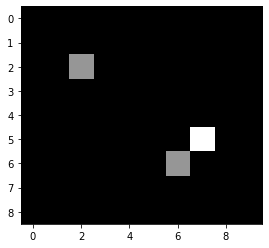

In [2]:
image = np.asarray([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).astype(float)

imshow(image)

接下来，我们定义一个简单的卷积核，它由一个小图像表示。

In [3]:
kernel = np.asarray([
  [0, 1, 0],
  [1, 1, 1],
  [0, 1, 0],
])

接下来，我们使用[scipy.ndimage.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html)对图像进行卷积。当我们打印结果时，我们可以看到原始图像中的`1`是如何扩散的，因为对于每个直接相邻的像素，核会对邻居强度进行求和。如果原始图像中有多个强度 > 0 的像素，结果图像将在它们的邻域计算总和。你可以称这个核为局部求和核。

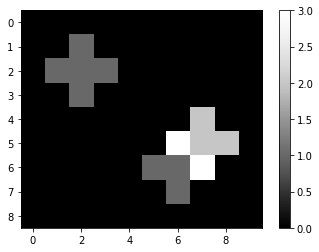

In [4]:
convolved = convolve(image, kernel)

imshow(convolved, colorbar=True)

In [5]:
convolved

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 2., 2., 0.],
       [0., 0., 0., 0., 0., 1., 1., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 其他核
根据用于卷积的核的不同，图像可能看起来非常不同。例如，_均值_核在局部计算平均像素强度：

In [6]:
mean_kernel = np.asarray([
  [0, 0.2, 0],
  [0.2, 0.2, 0.2],
  [0, 0.2, 0],
])

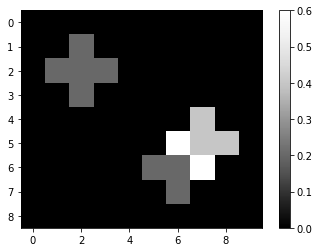

In [7]:
mean_convolved = convolve(image, mean_kernel)

imshow(mean_convolved, colorbar=True)

In [8]:
mean_convolved

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.4, 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

以下核是[拉普拉斯算子](https://en.wikipedia.org/wiki/Laplace_operator)的一种简单形式。

In [9]:
laplace_operator = np.asarray([
  [0, 1, 0],
  [1, -4, 1],
  [0, 1, 0],
])

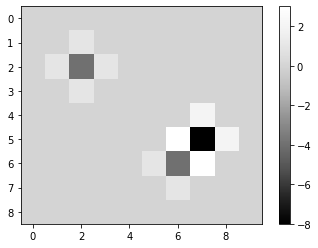

In [10]:
laplacian = convolve(image, laplace_operator)

imshow(laplacian, colorbar=True)

In [11]:
laplacian

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  3., -8.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -4.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

为了演示这些不同的核的作用，我们将它们应用于之前显示的MRI图像。

In [12]:
# 打开数据集并提取单个平面
noisy_mri = imread('../../data/Haase_MRT_tfl3d1.tif')[90].astype(float)

# 通过裁剪一部分来放大
noisy_mri_zoom = noisy_mri[50:100, 50:100]

In [13]:
convolved_mri = convolve(noisy_mri_zoom, kernel)
mean_mri = convolve(noisy_mri_zoom, mean_kernel)
laplacian_mri = convolve(noisy_mri_zoom, laplace_operator)

Text(0.5, 1.0, 'Mean-kernel')

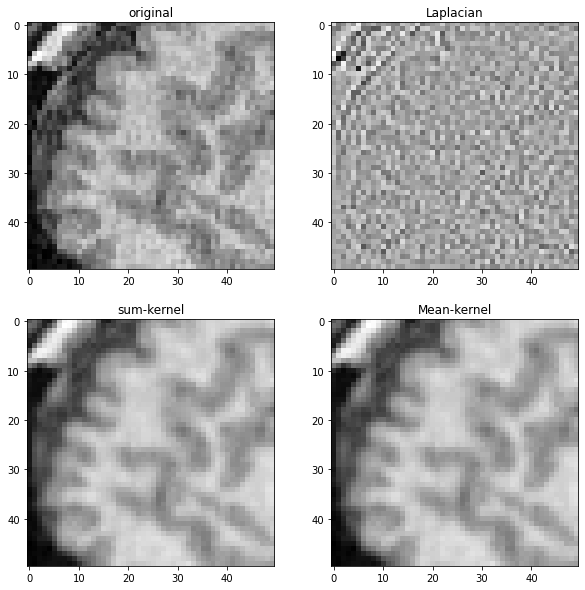

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

imshow(noisy_mri_zoom, plot=axes[0,0])
axes[0,0].set_title("原始")
imshow(laplacian_mri, plot=axes[0,1])
axes[0,1].set_title("拉普拉斯")
imshow(convolved_mri, plot=axes[1,0])
axes[1,0].set_title("求和核")
imshow(mean_mri, plot=axes[1,1])
axes[1,1].set_title("均值核")